In [32]:
import sys
import numpy as np
from numpy import pi, sqrt, inf, log
from ecell4 import *


#def exprnd(mu):
#    return log(1.0 / w.rng().uniform(0, 1)) * mu

def exprnd(mu):
    return np.random.exponential(mu)  

L = 100
voxel_radius = 0.005
D = 1
rng = GSLRandomNumberGenerator()
rng.seed(1)
#if len(sys.argv) > 1:
#    rng.seed(int(sys.argv[1]))

w = spatiocyte.create_spatiocyte_world_cell_list_impl(ones() * L, voxel_radius, Integer3(3, 3, 3), rng)

def singlerun1(tm, Pacc, alpha):
    assert Pacc * alpha <= 1
    assert alpha <= 1

    coord1 = w.position2coordinate(ones() * L * 0.5)
    coord2 = w.get_neighbor(coord1, 0)

    dt = tm * alpha
    t, nsteps = 0.0, 0
    while all(0 <= dim < L for dim in w.coordinate2position(coord2)) and nsteps < maxstep:
        rnd = w.rng().uniform_int(0, 11)
        newcoord = w.get_neighbor(coord2, rnd)
        if newcoord == coord1:
            if Pacc * alpha >= w.rng().uniform(0, 1):
                return True
        elif alpha >= w.rng().uniform(0, 1):
            coord2 = newcoord
        nsteps += 1      
        t += dt
    return 

def singlerun2(dt, Pacc):
    coord1 = w.position2coordinate(ones() * L * 0.5)
    neighbors = [w.get_neighbor(coord1, i) for i in range(12)]
    coord2 = neighbors[0]

    t, nsteps = 0.0, 0
    while all(0 <= dim < L for dim in w.coordinate2position(coord2)) and nsteps < maxstep:
        if coord2 in neighbors:
            dreact = exprnd(1./pr)
            desc = exprnd(dt)
        else:
            dreact = inf
            desc = exprnd(dt)

        if dreact <= desc:
            t += dreact
            return True
        else:
            rnd = w.rng().uniform_int(0, 11)
            newcoord = w.get_neighbor(coord2, rnd)
            if newcoord != coord1:
                coord2 = newcoord
            t += desc
        nsteps += 1
        
def singlerun3(dt, Pacc):
    coord1 = w.position2coordinate(ones() * L * 0.5)
    neighbors = [w.get_neighbor(coord1, i) for i in range(12)]
    coord2 = neighbors[0]
    t, nsteps = 0.0, 0
    
    while all(0 <= dim < L for dim in w.coordinate2position(coord2)) and nsteps < maxstep:
        if coord2 in neighbors:
            devent = exprnd(1./pt)
            dstep = inf#exprnd(dt)
        else:
            devent = inf
            dstep = exprnd(dt)

        if devent < dstep:
            t += devent
            if w.rng().uniform(0, 1)<=(pr/pt):
                return True
            else:
                newcoord = w.get_neighbor(coord2, w.rng().uniform_int(0, 11))
                while newcoord==coord1:
                    newcoord = w.get_neighbor(coord2, w.rng().uniform_int(0, 11))
                if (newcoord==coord1):
                    print 'error'
                    break
                coord2 = newcoord               
        else:
            rnd = w.rng().uniform_int(0, 11)
            newcoord = w.get_neighbor(coord2, rnd)
            t += dstep
        nsteps += 1        
        
def singlerun4(dt, Pacc):#from shell to shell
    coord1 = w.position2coordinate(ones() * L * 0.5)
    neighbors = [w.get_neighbor(coord1, i) for i in range(12)]
    coord2 = neighbors[0]
    t, nsteps = 0.0, 0
    
    while all(0 <= dim < L for dim in w.coordinate2position(coord2)) and nsteps < maxstep:
        rnd = w.rng().uniform_int(0, 11)
        coord2 = w.get_neighbor(coord2, rnd)
        nsteps += 1       
        if coord2 in neighbors:
            return True
        

kD = 4 * pi * (2 * voxel_radius) * D
ka_factor = 10.  # 100.0
ka = kD * ka_factor
Pacc = ka / (6 * sqrt(2) * D * voxel_radius)
dt = (4 * voxel_radius * voxel_radius) / (6 * D)
pr = Pacc/12/dt
pe = 11./12/dt
pt = pr+pe
alpha=1./Pacc

print Pacc, Pacc/(Pacc+12),alpha,alpha*Pacc
maxstep= 2#int(float(L/voxel_radius))
ntrials = 10000000
res = [singlerun1(dt, Pacc, alpha) for _ in range(ntrials)]
#res = [singlerun2(dt, Pacc) for _ in range(ntrials)]
#print res
#rebprob= float(res.count(True)) / len(res)
#print rebprob
#t=Pacc/(Pacc+12)
#print (t-rebprob)*100/t
#print res
#times = np.array([i for i in res if i != None])
#print float(len(times))/ntrials
#print float(len(times[times<dt]))/ntrials
#ptot = 1./(1+(1./0.256318-1)/Pacc)
#print ptot,(ptot-rebprob)*100/ptot

29.6192195877 0.711671671913 0.0337618618559 1.0


In [33]:
def gethist2(ret,norun): #to get rxn fraction for each discrete t
    uq,uqcnt = np.unique(ret,return_counts=True)
    freq = [float(i)/norun for i in uqcnt]
    for i,j in zip(uq,uqcnt): print i,float(j)/norun
    #plt.loglog(freq,'.')
gethist2(res,ntrials)    

None 0.8419529
0 0.0832309
1 0.0748162


In [35]:
((1-alpha)*11/12 +alpha/3)/12,((1-alpha)+alpha/3)/12

(0.074747687270894161, 0.081457674341339367)

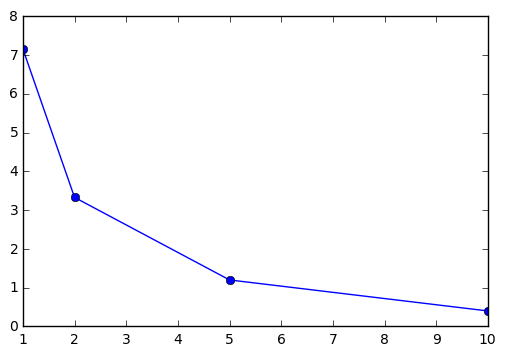

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([1,2,5,10],[7.16,3.33,1.2,0.4],'-o')

In [19]:
def out(p,b2):
    b1=p/12
    b=b1+b2
    a1=b1/b
    a2=1-a1
    r=1-(1./0.256318-1)/12
    return a1/(1-a2*r)
p=2.9619
t=out(p,1)
s=out(p,11./12)
print t,s,(t-s)*100/t

0.505158889747 0.526885959164 -4.30103673487


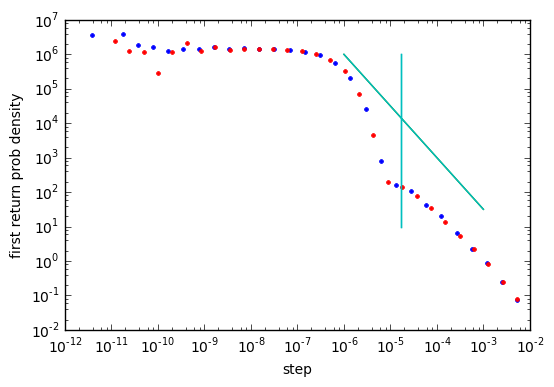

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
def plothist(times):
    hist, bin_edges = np.histogram(times,bins=np.logspace(np.log10(min(times)),np.log10(max(times)),30))
    tt = 0.5*(bin_edges[:-1]+bin_edges[1:])
    binwid = -(bin_edges[:-1]-bin_edges[1:])
    ft = np.array([float(h)/ntrials/b for h,b in zip(hist,binwid)])
    plt.loglog(tt,ft,'.')
    z = lambda x: 1e-3*(x**-1.5) #t^(-0.5)
    #w = lambda x: 0.1*(x**-0.5) #t^(-0.5)
    plt.plot(np.logspace(-6,-3,50),z(np.logspace(-6,-3,50)),label='p ~ t^-1.5')
    #plt.plot(np.logspace(-6,1,50),w(np.logspace(-6,1,50)),'r',label='p ~ t^-0.5')
    prange = np.logspace(1,6,10)
    plt.plot([dt]*len(prange),prange,'c')
    plt.xlabel('step')
    plt.ylabel('first return prob density')
    #totalsum = sum(ft*binwid)
    
plothist(times)
plothist(times2)

In [55]:
ka_factor = 100  # 100.0
ka = kD * ka_factor
Pa = ka / (6 * sqrt(2) * D * voxel_radius)
alpha = Pa/(Pa+12)
dt = (4 * voxel_radius * voxel_radius) / (6 * D)
#k0 = Pa*(4*np.pi*voxel_radius**3 /3)/dt
k0 = 6*sqrt(2)*voxel_radius*Pa*D
E = 19.271868
R0 = 0.256318
Rl = 1-(1./R0 -1)/12
kefft = ka*kD/(ka+kD)
#print k0/(1+alpha*E)
keffl = (1-(alpha/(1-(1-alpha)*Rl)))*k0
print kefft,keffl
print abs(kefft-keffl)*100/kefft

0.124419511033 0.12190202184
2.02338778872


In [25]:
for i in range(1000000):
    z=w.rng().uniform(1e-12, 1)
    k=1./z
    if (z==0): print z

In [32]:
P=np.array([0.5045,0.9085,0.991])
1./(1./P-1)

array([   1.01816347,    9.92896175,  110.11111111])

In [46]:
1-(((1./0.256318)-1)/12)

0.758216356244977

In [59]:
100./0.01

10000.0

In [5]:
D=1
import math
import numpy as np
pi=np.pi
voxel_radius=0.005
kaf=10
kD = 4 * pi * (2 * voxel_radius) * D
ka_factor = kaf  # 100.0
ka = kD * ka_factor
Pacc = ka / (6 * math.sqrt(2) * D * voxel_radius)
print Pacc

29.6192195877


In [15]:
t=0.985986
s=0.986002
print (t-s)*100/t

-0.00162274109369


In [17]:
R0 = 0.256318
D=1
R=0.01
kD=4*3.14*R*D
ka=10*kD
#P=ka/3/2**0.5/D/R
P=(1./R0-1)/(1./(4*3.14*ka/(3*2**0.5*(ka+kD)*(1./R0-1)))-1)
G=P/(P+1./R0-1)
keff=G*3*2**0.5*D*R*(1./R0-1)
print keff,ka*kD/(ka+kD)

0.114181818182 0.114181818182
